In [16]:
#read date&time from csv
import csv
def read_date(pth):
    dates=[]
    with open(pth, 'r') as f:
        reader = csv.reader(f, delimiter=',')
        for row in reader:
            if(len(row[0].split('-')) != 3):
                continue
            #print(row[0])
            y,m,d=row[0].split('-')
            dates.append({'year':int(y), 'mon':int(m), 'day':int(d)})
    return dates

In [17]:
newPos = read_date('new-position-date.csv')
intRep = read_date('interview-report-date.csv')

In [18]:
def count(dates):
    rst={}
    for d in dates:
        if d['year'] not in rst:
            rst[d['year']]=[0]*12 
        rst[d['year']][d['mon']-1] += 1  
    return rst

In [19]:
posDist = count(newPos)
print(posDist)

{2012: [0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0], 2013: [0, 0, 0, 0, 0, 1, 2, 2, 4, 3, 3, 6], 2014: [1, 7, 6, 3, 4, 1, 15, 13, 7, 2, 8, 5], 2015: [8, 9, 17, 18, 16, 8, 27, 19, 28, 32, 10, 29], 2016: [20, 26, 30, 37, 26, 32, 27, 56, 59, 38, 27, 23], 2017: [32, 48, 63, 48, 43, 12, 0, 0, 0, 0, 0, 0]}


In [57]:
#draw distrubtion each month
import matplotlib.pyplot as plt
import datetime


def drawMonBar(dist, title=''):
    count=[0]*12
    for k in dist:
        v = dist[k]
        #ignore this year as not valid data
        if k!=datetime.datetime.now().year:
            count=[count[i] + v[i] for i in range(12)]  
    bars=plt.bar(left=[i for i in range(1, 13)], height=count)
    plt.xlabel('month', rotation='horizontal')
    plt.ylabel('number', rotation='vertical')
    plt.title(title)
    plt.figure(num=None, figsize=(8, 6), dpi=500, facecolor='w', edgecolor='k')
    plt.show()
    

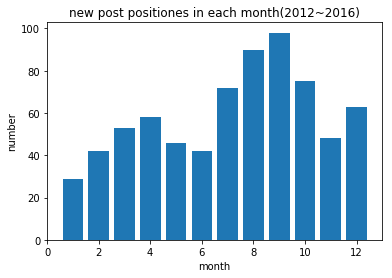

In [58]:
posDist = count(newPos)
drawMonBar(posDist, 'new post positiones in each month(2012~2016)')
#

In [9]:
import datetime
datetime.datetime.now().year==2017
arr1=[1,2,3]
arr2=[3,2,1]
arr1=[arr1[i] + arr2[i] for i in range(3)]
arr1

[4, 4, 4]

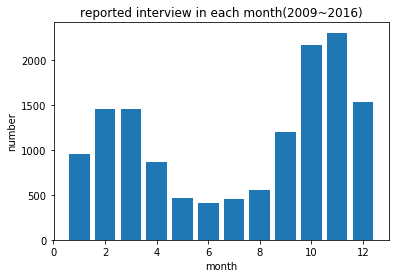

In [61]:
intDist = count(intRep)
drawMonBar(intDist, 'reported interview in each month(2009~2016)')